In [30]:
!pip install folium geopandas shapely seaborn matplotlib pandas


In [31]:
import pandas as pd
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap


In [36]:
df = pd.read_csv(r"E:\Cognify\Dataset .csv")  # Replace with actual file path  

# Show dataset columns
print("Columns in dataset:", df.columns.tolist())

# Remove spaces from column names
df.columns = df.columns.str.strip()

# Rename columns if necessary
df.rename(columns={'Latitude': 'lat', 'Longitude': 'lon'}, inplace=True)

# Ensure lat & lon exist
if 'lat' not in df.columns or 'lon' not in df.columns:
    raise ValueError("Dataset must contain 'lat' and 'lon' columns.")

df.head()


Columns in dataset: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,lon,lat,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
map_center = [df['lat'].mean(), df['lon'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

for _, row in df.dropna(subset=['lat', 'lon']).iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Name: {row.get('restaurant_name', 'N/A')}<br>Rating: {row.get('rating', 'N/A')}",
        icon=folium.Icon(color="blue")
    ).add_to(m)

m


In [ ]:
heat_data = df[['lat', 'lon']].dropna().values.tolist()
m_heat = folium.Map(location=map_center, zoom_start=10)
HeatMap(heat_data).add_to(m_heat)
m_heat


C:\Users\acer\AppData\Local\Temp\ipykernel_20136\58843828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['City'], order=df['City'].value_counts().index[:10], palette="coolwarm")


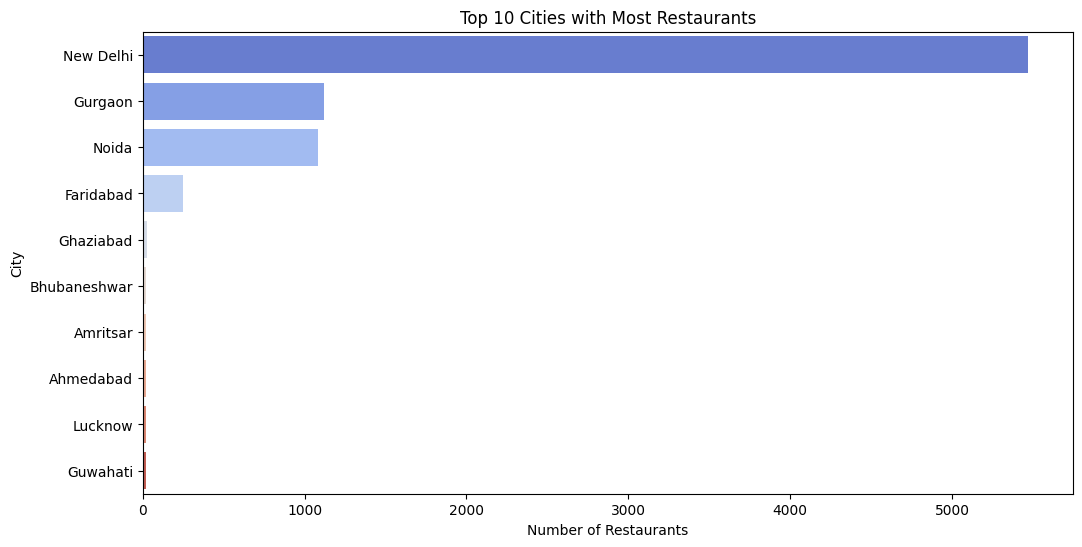

In [27]:
if 'City' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df['City'], order=df['City'].value_counts().index[:10], palette="coolwarm")
    plt.title("Top 10 Cities with Most Restaurants")
    plt.xlabel("Number of Restaurants")
    plt.ylabel("City")
    plt.show()
else:
    print("No 'City' column found in dataset.")


In [28]:
if 'rating' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['lon'], y=df['lat'], hue=df['rating'], palette='coolwarm', size=df['rating'])
    plt.title("Geospatial Distribution of Ratings")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
else:
    print("No 'rating' column found in dataset.")


No 'rating' column found in dataset.
